<span style="font-size:26.6px;"><b>Read Committed Isolation Level</b></span>

## O nível de isolamento da transação <span style="box-sizing: inherit; font-weight: 700; line-height: inherit; color: rgb(34, 34, 34); font-family: &quot;Helvetica Neue&quot;, Helvetica, Roboto, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);"><font style="box-sizing: inherit; vertical-align: inherit;">READ COMMITTED</font></span> é o nível de **i<mark>solamento padrão nos bancos de dados Microsoft SQL Server</mark>**. Este nível evita leituras sujas, o que significa que a transação não tem permissão para ler dados sujos e não confirmados. Leituras não repetíveis e fantasmas, entretanto, são possíveis em transações executadas neste nível. Uma leitura não repetível significa que a mesma transação pode receber resultados diferentes ao ler a mesma linha mais de uma vez e uma leitura fantasma significa que na mesma transação, a mesma consulta pode retornar linhas diferentes devido à inserção de novas linhas.<span style="background-color: rgb(255, 255, 255); color: rgb(85, 85, 85); font-family: Roboto, &quot;helvetica neue&quot;, helvetica, arial, sans-serif; text-align: justify; font-size: 14px;"><b><br></b></span>

## 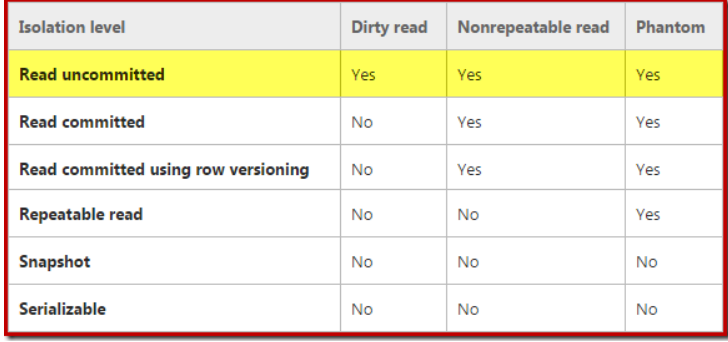

## **Read Commited é o nível de isolamento padrão.** No entanto, ele pode ser alterado

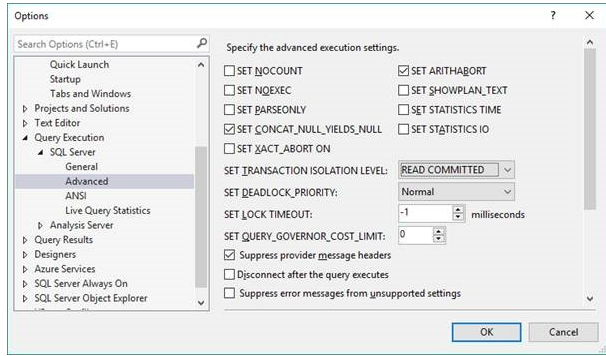

# **Exemplo 1**

### **Passo 1:** Criar a Tabela ReadCommittedDemo Vamos criar uma tabela simples chamada "RepeatableReadDemo" com uma coluna "Valor" para armazenar valores.

In [11]:
DROP TABLE if EXISTS ReadCommittedDemo;

CREATE TABLE ReadCommittedDemo (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    Valor INT
);

--Inserir Dados Iniciais Inseriremos alguns dados iniciais na tabela:
INSERT INTO ReadCommittedDemo (Valor) VALUES (100), (200);

(2 rows affected)

Total execution time: 00:00:00.004

In [14]:
Select * from  ReadCommittedDemo

(3 rows affected)

Total execution time: 00:00:00.003

ID,Valor
1,100
2,200
3,300


### \*\*Passo 2: Demonstração do Nível READ <span style="font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre; color: rgb(0, 0, 255);"><b>COMMITTED</b></span>

Nessa Aba\*\*

In [13]:
SET TRANSACTION  ISOLATION LEVEL READ COMMITTED

BEGIN TRANSACTION 

INSERT INTO ReadCommittedDemo (Valor) VALUES (300);

WAITFOR DELAY '00:00:20';

COMMIT  TRANSACTION

(1 row affected)

Total execution time: 00:00:20.011

**Passo 3:** <span style="font-weight: bold; color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Transação 2: </span>   **Abrir (**<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; background-color: rgb(247, 247, 248);"><span style="background-color: rgb(255, 255, 254); font-size: 16px; white-space: pre-wrap;"><b>1.Demonstração do Nível </b></span><span style="background-color: rgb(255, 255, 254);">&nbsp;&nbsp;</span><strong style="background-color: rgb(255, 255, 254);">READ COMMITTED</strong><span style="background-color: rgb(255, 255, 254);">&nbsp;&nbsp;</span><span style="color: var(--vscode-foreground); background-color: rgb(255, 255, 254); font-size: 16px; white-space: pre-wrap;"><b>Segunda Aba</b></span><font color="rgba(0, 0, 0, 0)" face="Söhne, ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, Noto Sans, sans-serif, Helvetica Neue, Arial, Apple Color Emoji, Segoe UI Emoji, Segoe UI Symbol, Noto Color Emoji" style="font-weight: bold; color: var(--vscode-foreground); font-size: 14px;"><span style="font-size: 16px; white-space: pre-wrap;">)</span></font></span>

1. ### **O que está acontecendo por tras dos panos**
    

- <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">A Transação 1 inicia com o nível "<span style="color: rgb(74, 74, 74); font-family: &quot;Segoe WPC&quot;, &quot;Segoe UI&quot;, sans-serif; font-size: 14px; white-space: normal; background-color: rgb(255, 255, 254);">&nbsp;</span><strong style="color: rgb(74, 74, 74); font-family: &quot;Segoe WPC&quot;, &quot;Segoe UI&quot;, sans-serif; font-size: 14px; white-space: normal; background-color: rgb(255, 255, 254);">READ COMMITTED</strong>" e Insere o valor 300 ana tabela. <b>O nível de isolamento impede que outras transações modifiquem as linhas que estão sendo lidas por esta transação até que ela seja confirmada ou leia a linha inserida.</b></span>
    
- <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Simultaneamente, a<b> Transação 2 também inicia com o nível "<strong style="color: rgb(74, 74, 74); font-family: &quot;Segoe WPC&quot;, &quot;Segoe UI&quot;, sans-serif; font-size: 14px; white-space: normal; background-color: rgb(255, 255, 254);">READ COMMITTED</strong>" e tenta ler a tabela, ela é bloqueada até que a Transação 1 seja confirmada.</b></span>
    
- <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Somente após a conclusão da Transação 1, a Transação 2 é liberada para executar a atualização.</span>
    

### <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);"><b>No nível "READ COMMITTED," uma transação lê apenas dados confirmados por transações anteriores, evitando leituras sujas, como mencionado anteriormente. No entanto, outras transações ainda podem modificar as linhas lidas pela transação atual entre leituras, o que pode levar a leituras não repetíveis (quando os dados mudam entre as leituras).</b></span>

# WAITS : LCK\_M\_S

# <span style="background-color: rgb(255, 255, 255);">Essa espera ocorre quando uma solicitação está aguardando para adquirir um bloqueio compartilhado.</span> **<mark>Isso normalmente acontece quando as solicitações de leitura são bloqueadas por transações de gravação</mark>** <span style="background-color: rgb(255, 255, 255);"> (implícitas ou explícitas) que foram mantidas abertas por longos períodos de tempo.</span>

# **Exemplo 2**

### **\*\*Passo 1: Demonstração do Nível READ <span style="font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre; color: rgb(0, 0, 255);">COMMITTED</span>**

In [15]:
SET LOCK_TIMEOUT -1


SET TRANSACTION  ISOLATION LEVEL READ COMMITTED

BEGIN TRANSACTION 

INSERT INTO ReadCommittedDemo (Valor) VALUES (400);

WAITFOR DELAY '00:00:15';

COMMIT  TRANSACTION

(1 row affected)

Total execution time: 00:00:15.013

**Passo2:** <span style="color: var(--tw-prose-bold); font-weight: bold; background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Transação 2: </span>    **Abrir (**<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; background-color: rgb(247, 247, 248);"><span style="background-color: rgb(255, 255, 254); font-size: 16px; white-space: pre-wrap;"><b>2.Demonstração do Nível </b></span><span style="background-color: rgb(255, 255, 254);">&nbsp;&nbsp;</span><strong style="background-color: rgb(255, 255, 254);">READ COMMITTED</strong><span style="background-color: rgb(255, 255, 254);">&nbsp;&nbsp;</span><span style="color: var(--vscode-foreground); background-color: rgb(255, 255, 254); font-size: 16px; white-space: pre-wrap;"><b>Segunda Aba</b></span><font face="Söhne, ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, Noto Sans, sans-serif, Helvetica Neue, Arial, Apple Color Emoji, Segoe UI Emoji, Segoe UI Symbol, Noto Color Emoji" style="font-weight: bold; color: var(--vscode-foreground);"><span style="font-size: 16px; white-space: pre-wrap;">)</span></font></span>

# **Exemplo 3**

In [16]:
DROP TABLE if EXISTS ReadCommittedDemo;

CREATE TABLE ReadCommittedDemo (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    Valor INT
);

--Inserir Dados Iniciais Inseriremos alguns dados iniciais na tabela:
INSERT INTO ReadCommittedDemo (Valor) VALUES (100), (200);

(2 rows affected)

Total execution time: 00:00:00.005

### **\*\*Passo 1: Demonstração do Nível READ <span style="font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre; color: rgb(0, 0, 255);">COMMITTED</span>**

In [18]:
SET TRANSACTION  ISOLATION LEVEL READ COMMITTED

BEGIN TRANSACTION 

INSERT INTO ReadCommittedDemo (Valor) VALUES (400);

WAITFOR DELAY '00:00:15';

COMMIT  TRANSACTION

(1 row affected)

Total execution time: 00:00:15.015

**Passo2:**  **Abri uma segunda transação<span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">: </span>     Abrir (<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; background-color: rgb(247, 247, 248);"><span style="background-color: rgb(255, 255, 254); font-size: 16px; white-space: pre-wrap;">3.Demonstração do Nível </span><span style="background-color: rgb(255, 255, 254);">&nbsp;&nbsp;</span><span style="background-color: rgb(255, 255, 254);">READ COMMITTED</span><span style="background-color: rgb(255, 255, 254);">&nbsp;&nbsp;</span><span style="color: var(--vscode-foreground); background-color: rgb(255, 255, 254); font-size: 16px; white-space: pre-wrap;">Segunda Aba</span><font face="Söhne, ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, Noto Sans, sans-serif, Helvetica Neue, Arial, Apple Color Emoji, Segoe UI Emoji, Segoe UI Symbol, Noto Color Emoji" style="color: var(--vscode-foreground);"><span style="font-size: 16px; white-space: pre-wrap;">)</span></font></span>**